<a href="https://colab.research.google.com/github/udayr2809/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [69]:
import pandas as pd
import numpy as np

Kaggle API

In [70]:
! kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
from zipfile import ZipFile
file_name = "sentiment140.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


Loading Data

In [72]:
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header= None)

Exploring Data

In [73]:
twitter_data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [74]:
columns=['target','ids','date','flag','user','text']

In [75]:
twitter_data=pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin-1',names=columns)

In [76]:
twitter_data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [77]:
twitter_data.shape

(1600000, 6)

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
print(twitter_data.isnull().sum())

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


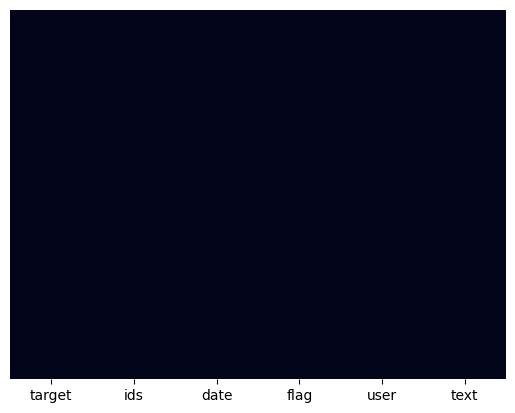

In [80]:
sns.heatmap(twitter_data.isnull(),yticklabels=False,cbar=False)
plt.show()

In [81]:
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [45]:
twitter_data.replace({'target':{4:1}},inplace=True)

NLP Preprocessing

In [46]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.stem.porter import PorterStemmer
por= PorterStemmer()

In [48]:
def stemming(text):
  new_text= re.sub('[^a-zA-Z]',' ',text)
  new_text=new_text.lower()
  new_text=new_text.split()
  new_text=[por.stem(word) for word in new_text if not word in stopwords.words('english')]
  new_text=' '.join(new_text)
  return new_text

In [49]:
twitter_data['stemmed text']=twitter_data['text'].apply(stemming)

In [50]:
twitter_data.head()

,target,ids,date,flag,user,text,stemmed text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [53]:
twitter_data['stemmed text'].head()

0    switchfoot http twitpic com zl awww bummer sho...
1    upset updat facebook text might cri result sch...
2    kenichan dive mani time ball manag save rest g...
3                      whole bodi feel itchi like fire
4                        nationwideclass behav mad see
Name: stemmed text, dtype: object

In [54]:
twitter_data['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [56]:
X=twitter_data['stemmed text'].values
y=twitter_data['target'].values

Vectorization

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)

Machine Learning Model

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [68]:
trainind_data_accuracy = model.score(X_train, y_train)
print(f"Training Data Accuracy: {trainind_data_accuracy}")

Training Data Accuracy: 0.8200265625


In [66]:
y_pred = model.predict(X_test)

Model Evaluation

In [82]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.755815625
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76    160000
           1       0.77      0.73      0.75    160000

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [83]:
import pickle

In [84]:
filename='sentiment_analysis.sav'
pickle.dump(model,open(filename,'wb'))